In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## df = pd.read_csv('Bookings.csv')

In [3]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from the drive
df = pd.read_csv('/content/drive/MyDrive/Data Folder/Bookings.csv')

# Print the first few rows of the DataFrame
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


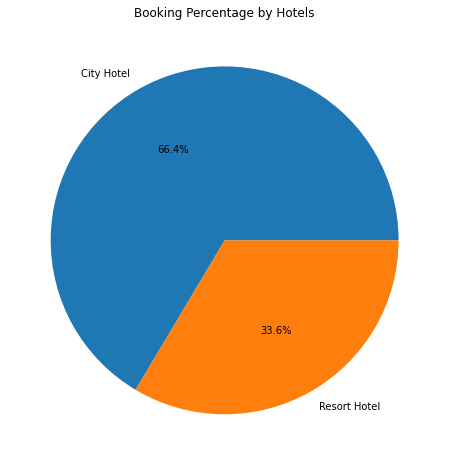

In [7]:
# Group the data by hotel name and count the number of occurrences
hotel_counts = df.groupby('hotel')['hotel'].count()

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Plot the data as a pie chart
plt.pie(hotel_counts.values, labels=hotel_counts.index, autopct='%1.1f%%')
plt.title('Booking Percentage by Hotels')
plt.show()


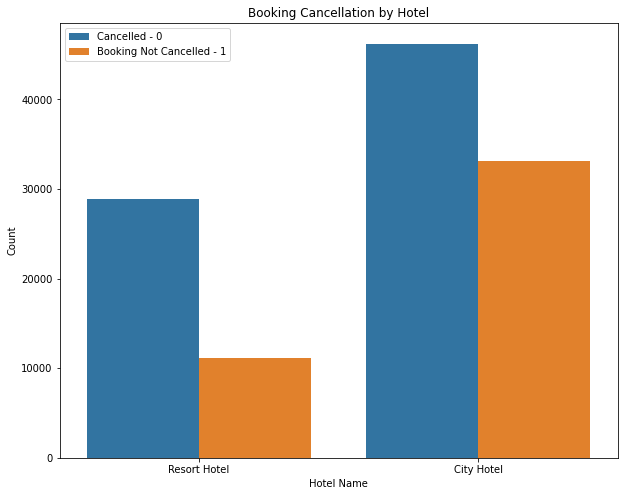

In [8]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Define the hue labels
hue_labels = ['Cancelled - 0', 'Booking Not Cancelled - 1']


# Plot the data as a bar plot
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Booking Cancellation by Hotel')
plt.xlabel('Hotel Name')
plt.ylabel('Count')

# Update the hue legend labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, hue_labels)

# Show the chart
plt.show()

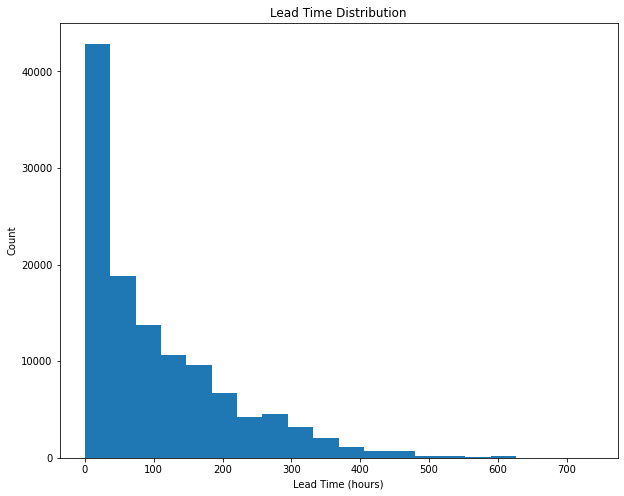

In [9]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a histogram of the lead_time column
plt.hist(df['lead_time'], bins=20)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (hours)')
plt.ylabel('Count')

# Show the chart
plt.show()

### Observations: 
Once you have created a histogram of the lead_time column, you can draw insights from the chart by examining its shape, center, and spread. Here are a few insights you might gain from this chart:

- The distribution is positively skewed. If the histogram is skewed to the right (i.e., there are more bookings with shorter lead times than with longer lead times), it may indicate that customers are more likely to make last-minute bookings.

- The center of the distribution is around a certain lead time. If the histogram has a peak or is more concentrated in a certain range of lead times, it may suggest that there is a typical or preferred booking window for customers. This can help hotels optimize their marketing and pricing strategies.

- The spread of the distribution varies. If the histogram has a narrow spread (i.e., there is less variability in lead times), it may suggest that customers are more consistent in when they book their stays. Conversely, a wider spread (i.e., greater variability) may indicate that customers have different preferences or circumstances that influence when they book their stays.

- By analyzing the shape, center, and spread of the distribution, you can gain insights into customer behavior and preferences related to booking lead times. These insights can be used to optimize marketing and pricing strategies and improve customer satisfaction.

### Observations
If the histogram of the lead_time column is positively skewed, it means that there are more bookings with shorter lead times than with longer lead times. This can be seen in the chart as a longer tail on the right-hand side of the distribution.

There are several possible reasons why this might be the case. For example:

- Customers may be more likely to make last-minute bookings due to changes in their plans or preferences.

- Customers may be procrastinating or waiting for better deals before making their bookings.

- The hotel's pricing or availability may be encouraging customers to book closer to their desired check-in date.

- Customers may be more likely to book for shorter stays, which require less lead time to plan.

By understanding the reasons for the positively skewed distribution, hotels can adjust their pricing and marketing strategies to better serve their customers' needs and preferences. For example, they may offer more last-minute deals or promotions to encourage customers to book sooner, or they may adjust their pricing to incentivize longer lead times. Additionally, hotels can use this information to better forecast demand and allocate resources more effectively.

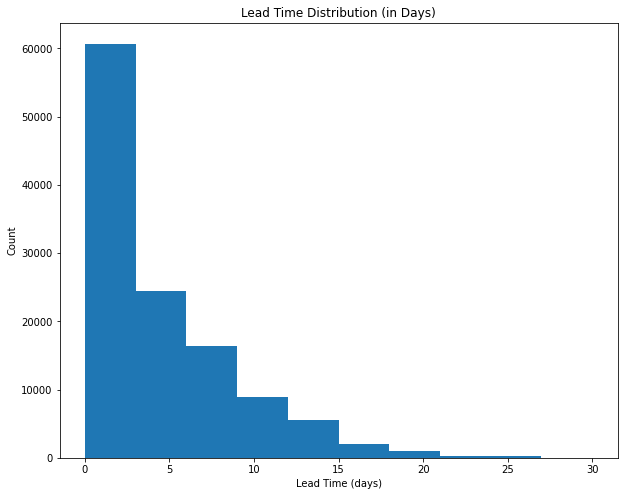

In [10]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Convert lead_time from hours to days
df['lead_time_days'] = df['lead_time'] // 24

# Create a histogram of the lead_time_days column
plt.hist(df['lead_time_days'], bins=10)
plt.title('Lead Time Distribution (in Days)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')

# Show the chart
plt.show()

### Observation

- Less than 5 days lead time: 65% 
- Bookings 5 - 10 days lead time: 21.8% 
- Bookings 10 - 15 days lead time: 9.6% 
- Bookings more than 15 days lead time: 2.85%

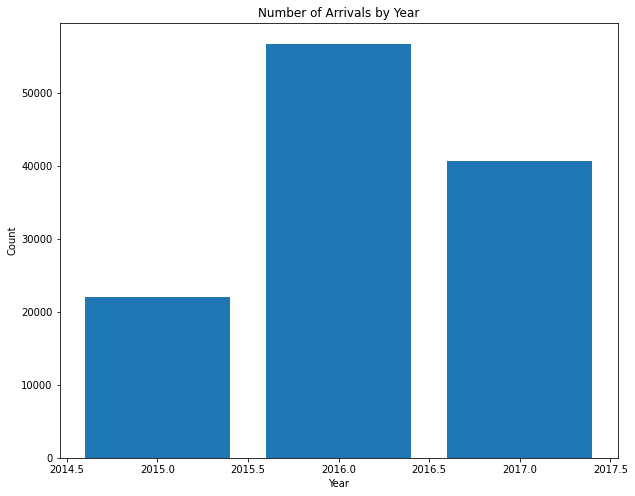

In [11]:
# Count the number of occurrences of each year
year_counts = df['arrival_date_year'].value_counts()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a bar chart of the year_counts data
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Arrivals by Year')
plt.show()

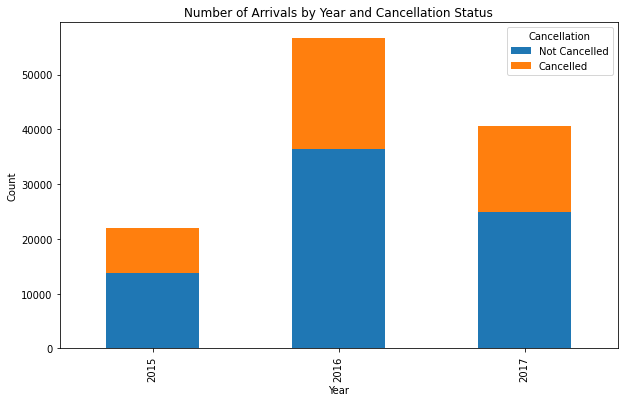

In [12]:
# Set the size of the figure
#plt.figure(figsize=(10, 6))


# Group the data by year and is_cancelled columns and count the number of occurrences
year_cancel_counts = df.groupby(['arrival_date_year', 'is_canceled']).size().unstack()

# Create a stacked bar chart of the year_cancel_counts data
year_cancel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Arrivals by Year and Cancellation Status')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'])
plt.gcf().set_size_inches(10, 6)
plt.show()

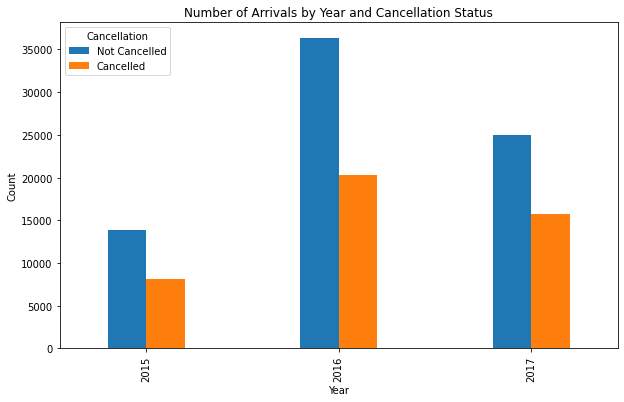

In [13]:
# Group the data by year and is_cancelled columns and count the number of occurrences
year_cancel_counts = df.groupby(['arrival_date_year', 'is_canceled']).size().unstack()

# Create a grouped bar chart of the year_cancel_counts data
year_cancel_counts.plot(kind='bar', width=0.4)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Arrivals by Year and Cancellation Status')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'], loc='upper left')
plt.gcf().set_size_inches(10, 6)
plt.show()

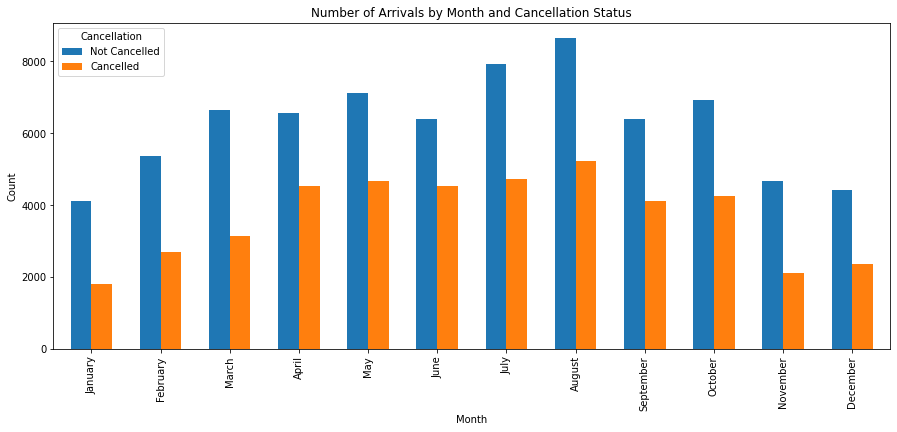

In [14]:
# Group the data by month and cancellation status and count the number of occurrences
month_cancel_counts = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Sort the rows of the dataframe according to the order of the months
month_cancel_counts = month_cancel_counts.reindex(month_order)

# Create a bar chart of the month_cancel_counts data
month_cancel_counts.plot(kind='bar', width=0.6)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Arrivals by Month and Cancellation Status')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'], loc='upper left')
plt.gcf().set_size_inches(15, 6)
plt.show()

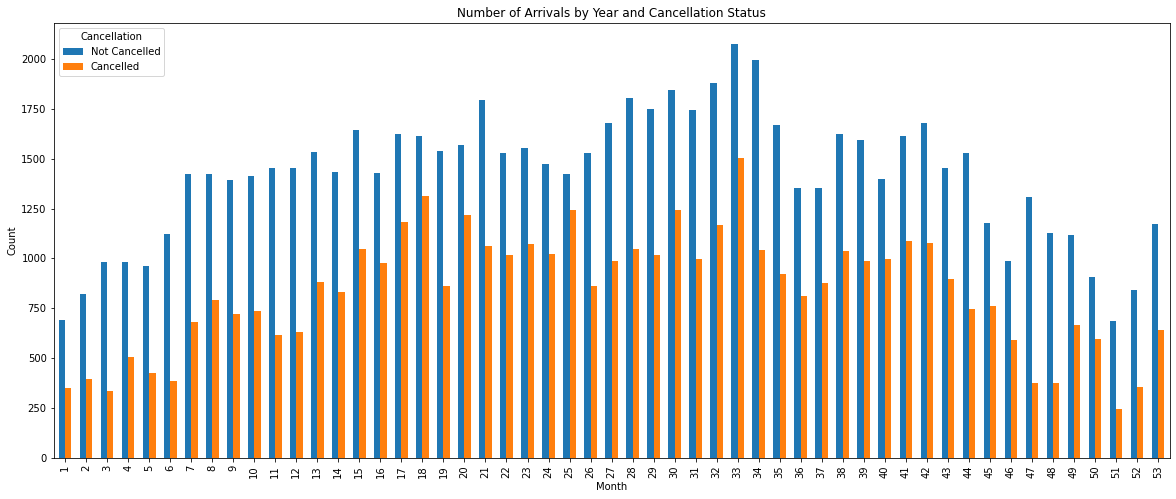

In [15]:
# Group the data by year and is_cancelled columns and count the number of occurrences
week_cancel_counts = df.groupby(['arrival_date_week_number', 'is_canceled']).size().unstack()

# Create a grouped bar chart of the year_cancel_counts data
week_cancel_counts.plot(kind='bar', width=0.6)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Arrivals by Year and Cancellation Status')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'], loc='upper left')
plt.gcf().set_size_inches(20, 8)
plt.show()

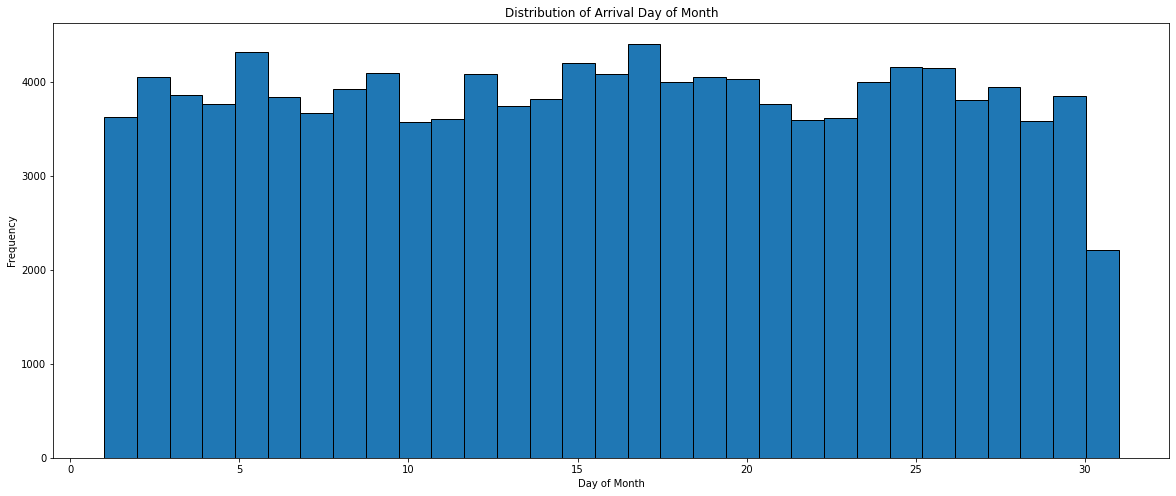

In [16]:
# Create a histogram of the arrival_day_of_month column
plt.hist(df['arrival_date_day_of_month'], bins=31, edgecolor='black')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Day of Month')
plt.gcf().set_size_inches(20, 8)
plt.show()

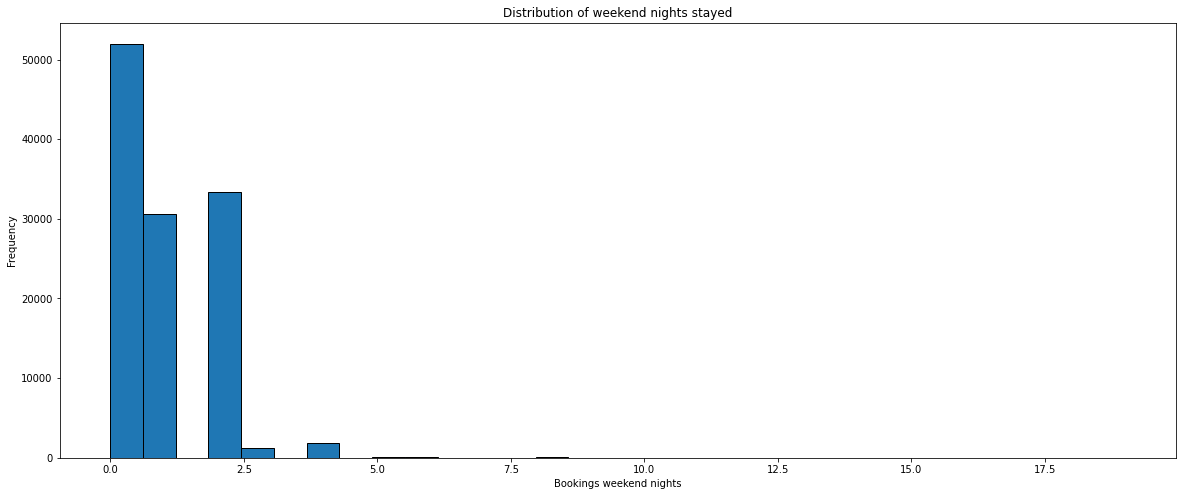

In [17]:
# Create a histogram of the arrival_day_of_month column
plt.hist(df['stays_in_weekend_nights'], bins=31, edgecolor='black')
plt.xlabel('Bookings weekend nights')
plt.ylabel('Frequency')
plt.title('Distribution of weekend nights stayed')
plt.gcf().set_size_inches(20, 8)
plt.show()

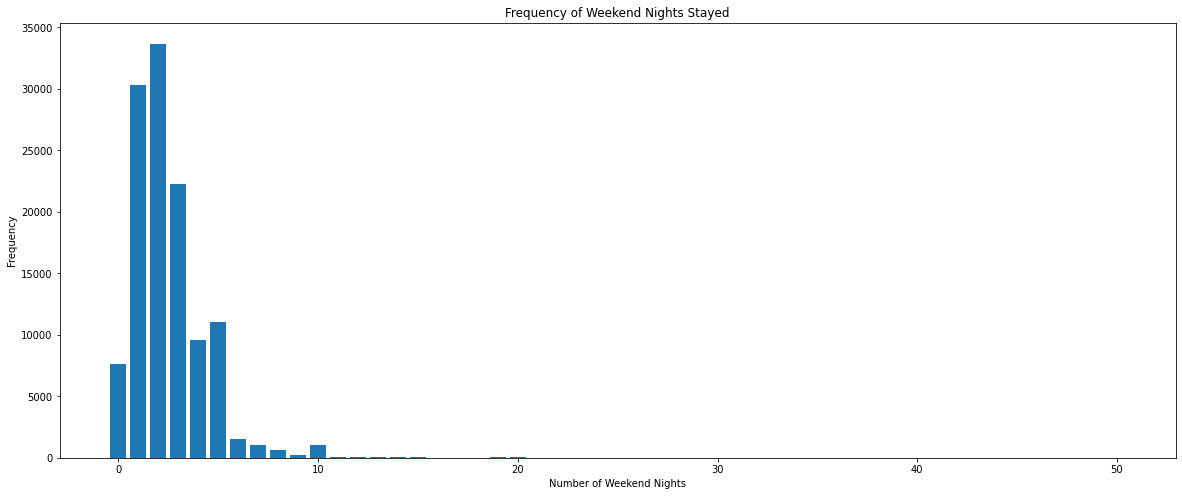

In [18]:
# Count the number of occurrences of each value in the stays_in_weekend_nights column
counts = df['stays_in_week_nights'].value_counts()

# Create a bar chart of the counts
plt.bar(counts.index, counts.values)
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.title('Frequency of Weekend Nights Stayed')
plt.gcf().set_size_inches(20, 8)
plt.show()

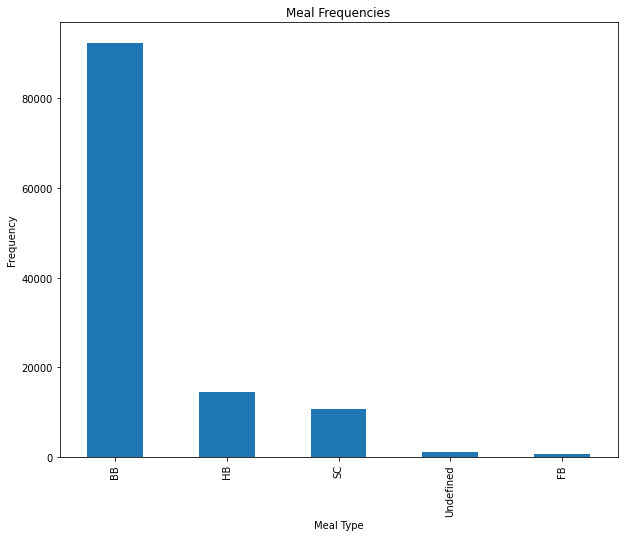

In [19]:
meals = df.loc[:, 'meal']
meal_counts = meals.value_counts()

meal_counts.plot(kind='bar')
plt.title('Meal Frequencies')
plt.xlabel('Meal Type')
plt.ylabel('Frequency')
plt.gcf().set_size_inches(10, 8)
plt.show()

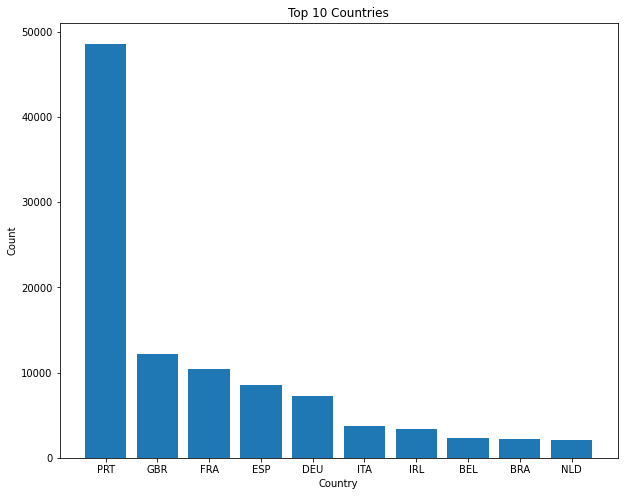

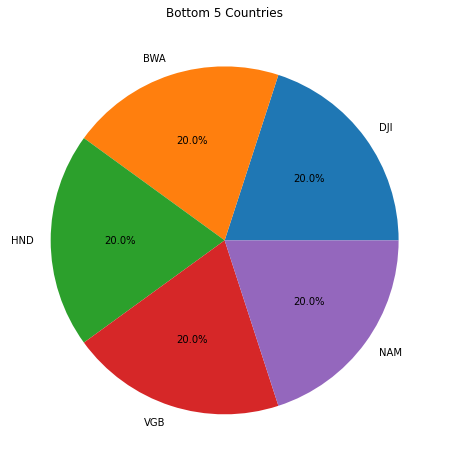

In [20]:
# Count the number of occurrences of each country
country_counts = df['country'].value_counts()

# Get the top 10 and bottom 5 countries
top_10_countries = country_counts.head(10)
bottom_5_countries = country_counts.tail(5)

# Create a bar chart for the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.gcf().set_size_inches(10, 8)
plt.show()

# Create a pie chart for the bottom 5 countries
plt.figure(figsize=(10, 6))
plt.pie(bottom_5_countries.values, labels=bottom_5_countries.index, autopct='%1.1f%%')
plt.title('Bottom 5 Countries')
plt.gcf().set_size_inches(10, 8)
plt.show()

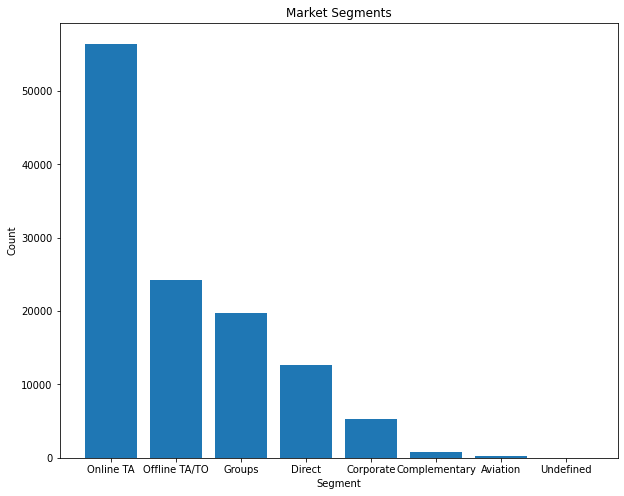

In [21]:
# Count the number of occurrences of each market_segment
segment_counts = df['market_segment'].value_counts()

# Create a bar chart for the market_segment
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.title('Market Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.gcf().set_size_inches(10, 8)
plt.show()


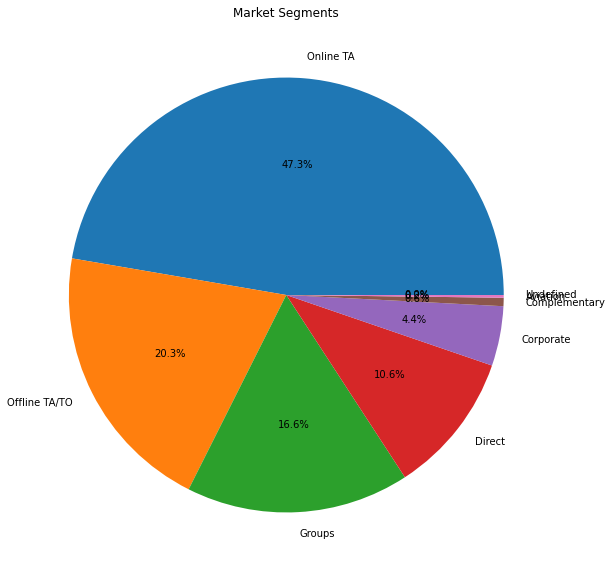

In [22]:
# Create a pie chart for the market_segment
plt.figure(figsize=(10, 6))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Market Segments')
plt.gcf().set_size_inches(12, 10)
plt.show()

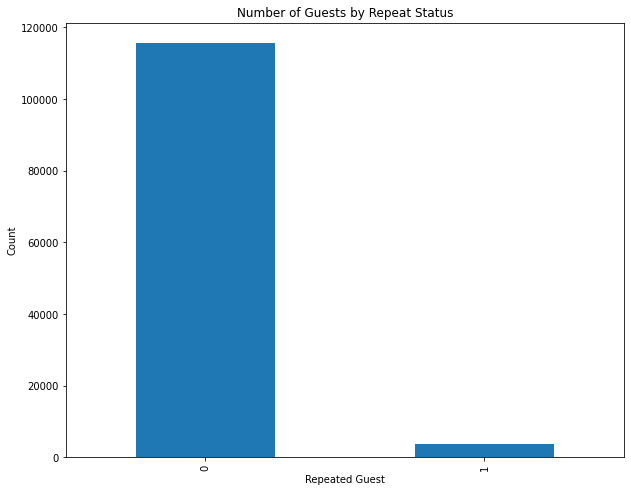

In [23]:
# Group the data by is_repeated_guest and count the number of occurrences
repeat_counts = df.groupby('is_repeated_guest').size()

# Create a bar chart of the repeat_counts data
repeat_counts.plot(kind='bar')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.title('Number of Guests by Repeat Status')
plt.gcf().set_size_inches(10, 8)
plt.show()

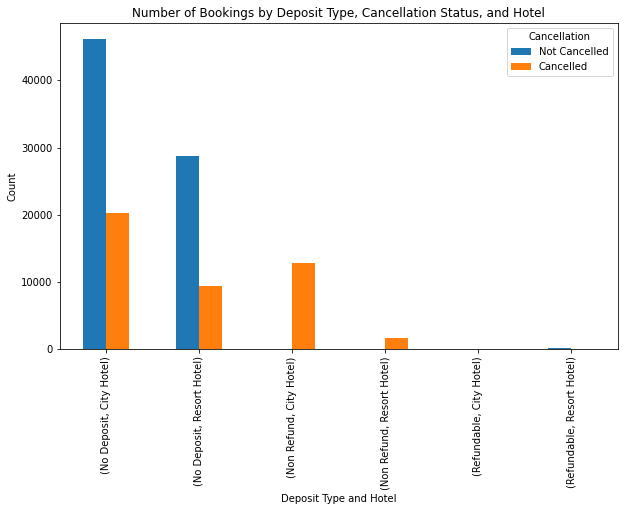

In [24]:
# Create a pivot table of the deposit_type, is_canceled, and hotel columns
pivot_table = pd.pivot_table(df, values='lead_time', index=['deposit_type', 'hotel'], columns='is_canceled', aggfunc=len, fill_value=0)

# Create a stacked bar chart of the pivot_table data
pivot_table.plot(kind='bar', stacked=False)
plt.xlabel('Deposit Type and Hotel')
plt.ylabel('Count')
plt.title('Number of Bookings by Deposit Type, Cancellation Status, and Hotel')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'], loc='upper right')
plt.gcf().set_size_inches(10, 6)
plt.show()

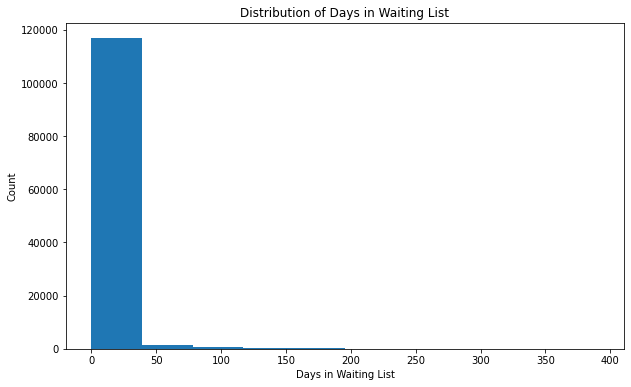

In [25]:
# Create a histogram of the days_in_waiting_list column
plt.hist(df['days_in_waiting_list'], bins=10)

# Set the labels and title
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.title('Distribution of Days in Waiting List')

# Show the plot
plt.gcf().set_size_inches(10, 6)
plt.show()

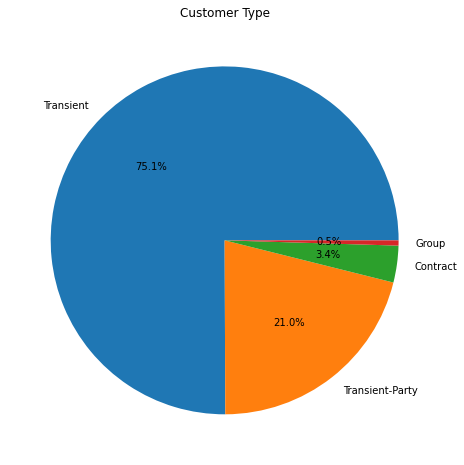

In [26]:
# Get the counts of each customer type
customer_type_counts = df['customer_type'].value_counts()

# Create a pie chart
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%')

# Set the title
plt.title('Customer Type')

# Show the plot
plt.gcf().set_size_inches(10, 8)
plt.show()

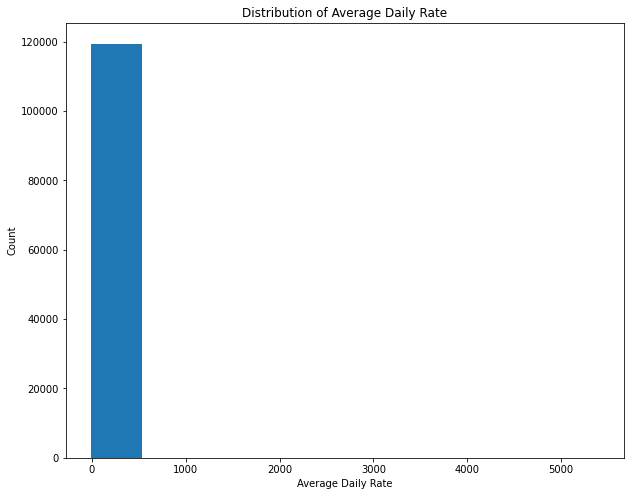

In [27]:
# Create a histogram of the adr column
plt.hist(df['adr'], bins=10)

# Set the labels and title
plt.xlabel('Average Daily Rate')
plt.ylabel('Count')
plt.title('Distribution of Average Daily Rate')

# Show the plot
plt.gcf().set_size_inches(10, 8)
plt.show()

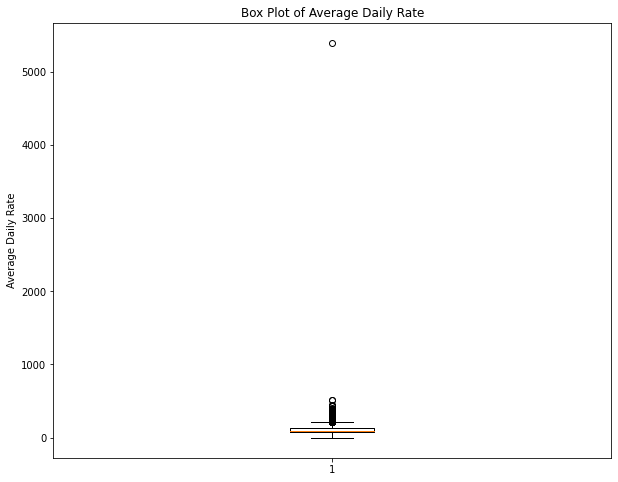

In [28]:
# Create a box plot of the adr column
plt.boxplot(df['adr'])

# Set the labels and title
plt.ylabel('Average Daily Rate')
plt.title('Box Plot of Average Daily Rate')

# Show the plot
plt.gcf().set_size_inches(10, 8)
plt.show()

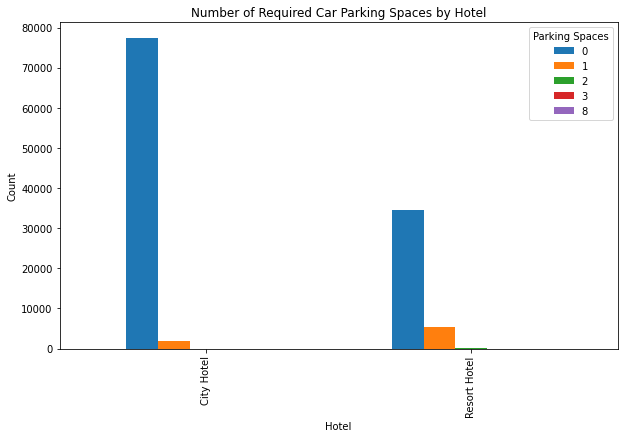

In [29]:
# Group the data by hotel and required_car_parking_spaces columns and count the number of occurrences
parking_counts = df.groupby(['hotel', 'required_car_parking_spaces']).size().unstack()

# Create a grouped bar chart of the parking_counts data
parking_counts.plot(kind='bar', width=0.6)

# Set the labels and title
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Number of Required Car Parking Spaces by Hotel')
plt.legend(title='Parking Spaces', loc='upper right')

# Show the plot
plt.gcf().set_size_inches(10, 6)
plt.show()

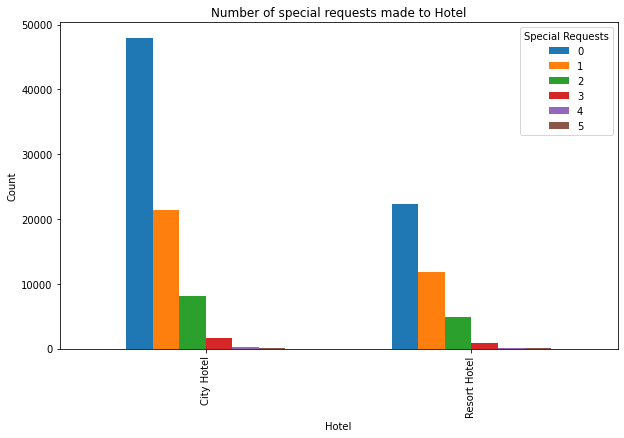

In [30]:
# Group the data by hotel and total_of_special_requests columns and count the number of occurrences
special_requests = df.groupby(['hotel', 'total_of_special_requests']).size().unstack()

# Create a grouped bar chart of the parking_counts data
special_requests.plot(kind='bar', width=0.6)

# Set the labels and title
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Number of special requests made to Hotel')
plt.legend(title='Special Requests', loc='upper right')

# Show the plot
plt.gcf().set_size_inches(10, 6)
plt.show()

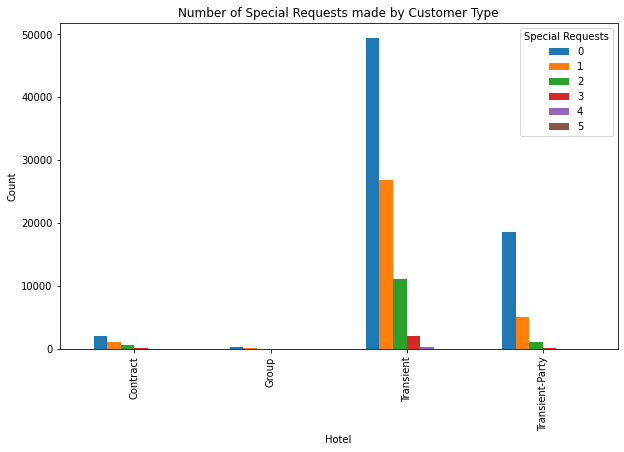

In [31]:
# Group the data by customer type and total_of_special_requests columns and count the number of occurrences
special_requests_custype = df.groupby(['customer_type', 'total_of_special_requests']).size().unstack()

# Create a grouped bar chart of the parking_counts data
special_requests_custype.plot(kind='bar', width=0.6)

# Set the labels and title
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Number of Special Requests made by Customer Type')
plt.legend(title='Special Requests', loc='upper right')

# Show the plot
plt.gcf().set_size_inches(10, 6)
plt.show()